# Speech Emotion Recognition - SER

**Definition**

Speech Emotion Recognition or SER is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

**Why we need it?**

Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

**For example**
1. SER is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services
2. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

In [29]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# librosa = Python library for analyzing audio and music. It can be used to extract the audio features from the audio files
import librosa # type: ignore
import librosa.display # type: ignore

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**Datasets used in this project**

Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)  
Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)  
Surrey Audio-Visual Expressed Emotion (Savee)  
Toronto emotional speech set (Tess)  

In [30]:
# Paths for data.
Ravdess = "C:/Users/Netanel/Desktop/AI/data/ravdess/audio_speech_actors_01-24/"
Crema = "C:/Users/Netanel/Desktop/AI/data/cremad/AudioWAV/"
Tess = "C:/Users/Netanel/Desktop/AI/data/tess/TESS/"
Savee = "C:/Users/Netanel/Desktop/AI/data/savee/ALL/"

**1. [Ravdess Dataframe](https://www.kaggle.com/code/putrimaulidias23/starter-ravdess-emotional-speech-audio-602d6e95-d)**

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


In [31]:
# 1440 files in total.
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as there are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
1,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
2,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
3,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
4,calm,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...


**2. [Crema DataFrame](https://www.kaggle.com/datasets/ejlok1/cremad)**

In [32]:
# 7442 files in total. 
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
1,disgust,C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
2,fear,C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
3,happy,C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
4,neutral,C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...


**3. [TESS dataset](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)**

In [33]:
# 2800 files in total. 
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
1,angry,C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
2,angry,C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
3,angry,C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
4,angry,C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...


**4. [SAVEE dataset](https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee)**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

**a** = 'anger' , **d** = 'disgust' , **f** = 'fear' , **h** = 'happiness' , **n** = 'neutral' , **sa** = 'sadness' , **su** = 'surprise'  



In [34]:
# 480 files in total.
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
1,angry,C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
2,angry,C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
3,angry,C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
4,angry,C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...


In [35]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
1,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
2,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
3,neutral,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
4,calm,C:/Users/Netanel/Desktop/AI/data/ravdess/audio...


**Data Visualisation and Exploration**

First let's plot the count of each emotions in our dataset.

After further checking, we decided to join 'calm' and 'neutral' classes together. The reason is that the signals are very similar and the main difference is the pace in which they talk - where 'calm' is slower then 'neutral' talk, thus even if the model could identify between these two, it would not be relevant for our use case.

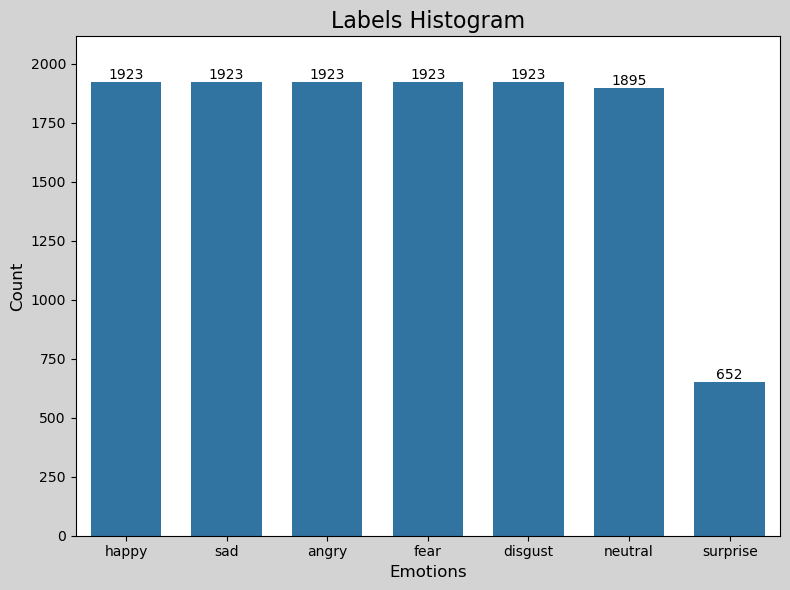

In [36]:
# Define custom color palette
# custom_palette = sns.color_palette('pastel')  # You can choose any palette you like

# Assuming data_path is your DataFrame
data_path['Emotions'] = data_path['Emotions'].replace('calm', 'neutral')

# Plot the count of each emotion
plt.figure(figsize=(8, 6), facecolor='lightgrey')

# sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, palette=custom_palette)
sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, width=0.7)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.title('Labels Histogram', size=16)

# Add count values on top of each bar
for index, value in enumerate(data_path['Emotions'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adjusting y-axis limit to show more
plt.ylim(0, data_path['Emotions'].value_counts().max() * 1.1)

# Add equal spacing after the plot from the right and left
plt.subplots_adjust(left=0.1, right=0.9)

# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()

<u>We can also plot waveplots and spectograms for audio signals</u>

- **Waveplots** - Waveplots let us know the loudness of the audio at a given time.
- **Spectograms** - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [37]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, color="slateblue")
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

**Data Augmentation**

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [38]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

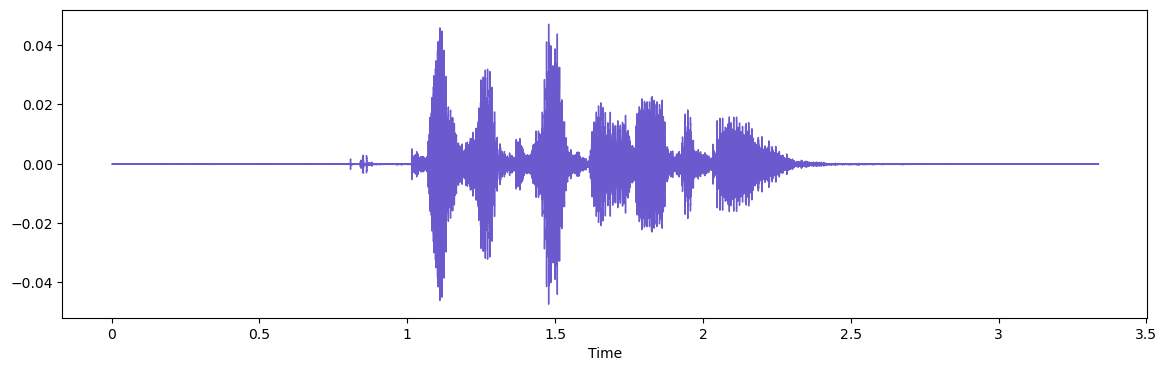

In [39]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate, color="slateblue")
Audio(path)

#### 2. Noise Injection

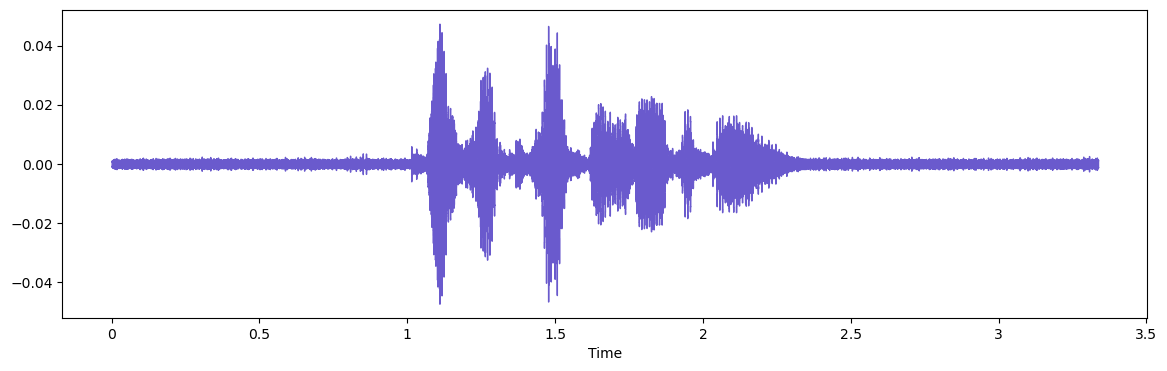

In [40]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted

#### 3. Stretching

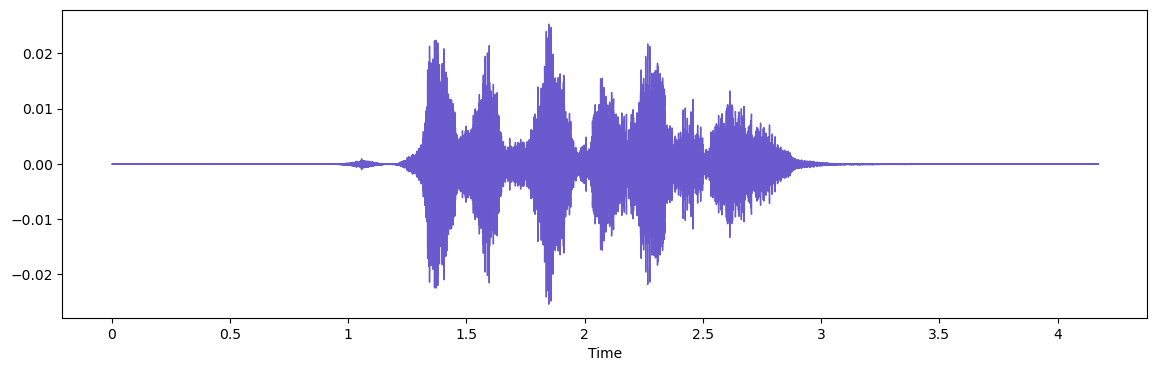

In [41]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

#### 4. Shifting

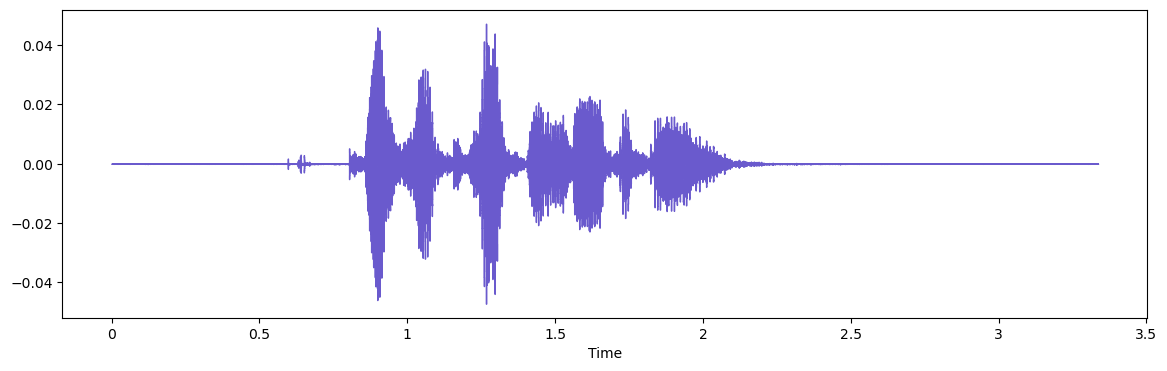

In [42]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

#### 5. Pitch

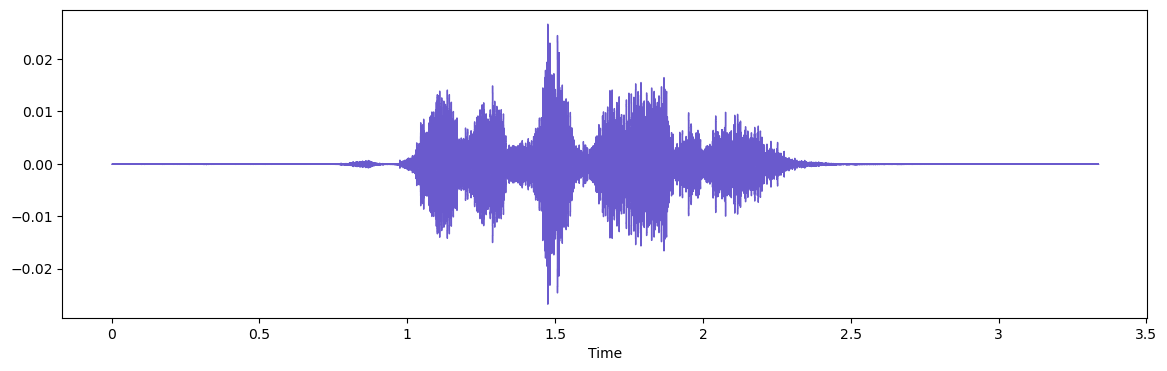

In [43]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)